Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Letícia da Silva Macedo Alves"
COLLABORATORS = ""

---

# Lista 04 - Teste de Hipótese

In [2]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Fixa a semente geradora de numeros aleatorios para gerar os mesmos resultados a cada execucao
np.random.seed(42)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [4]:
def q1a():
    # YOUR CODE HERE
    return [True, False, True]

In [5]:
#Resposta
q1a()

[True, False, True]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance (TVD):

$$ \mathit{TVD}(p, q) = \frac{1}{2}|p - q| = \frac{1}{2}\sum_{i=1}^n |p_i - q_i| $$    
onde $p$ e $q$ são os vetores de proporções

In [6]:
def tvd(p, q):
    # YOUR CODE HERE
    soma = 0
    
    for i in range(0,np.size(p)):
        diferencas = abs(p[i] - q[i])
        soma = soma+diferencas
        
    resultado = (1/2)*soma
    
    return resultado

In [7]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [8]:
def q1c():
    # YOUR CODE HERE
    prop_amostra = np.array([0.1, 0.6, 0.3]) #Proporções amostrais das áreas em relação ao número de entrevistados
    prop_real = np.array([0.16, 0.64, 0.2]) #Proporções reais das áreas em relação ao número total de alunos
    
    resultado = tvd(prop_amostra, prop_real)
    
    return resultado

In [9]:
#Resposta
q1c()

0.1

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

Por exemplo, o vetor [0, 0, 1, 1, 1, 2] representa uma população de tamanho 6, com dois elementos na classe 0, três elementos na classe 1 e um elemento na classe 2. As proporções são 2/6, 3/6 e 1/6, respectivamente.

In [10]:
def calcula_proporcao(amostra, valor):
    return sum(1 for x in amostra if x == valor) / len(amostra)

def gera_amostra(tamanho_amostra):
    # YOUR CODE HERE
    num_alunos_real = 12500
    prop_exatas_real = 0.16    #0
    prop_humanas_real = 0.64   #1
    prop_biologicas_real = 0.2 #2
    
    data = np.zeros(shape = num_alunos_real, dtype = int)
    data[:] = 2
    data[:int(len(data)*prop_exatas_real)] = 0
    data[int(len(data)*prop_exatas_real):int(len(data)*prop_exatas_real)+int(len(data)*prop_humanas_real)] = 1
    
    np.random.shuffle(data)
    amostra = data[:tamanho_amostra]
    
    num_exatas_amostra = (amostra == 0).sum()
    num_humanas_amostra = (amostra == 1).sum()
    num_biologicas_amostra = (amostra == 2).sum()
    
    lista_proporcoes = np.zeros(3)
    for i in range(0, 3):
        lista_proporcoes[i] = calcula_proporcao(amostra, i)
    
    return lista_proporcoes

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

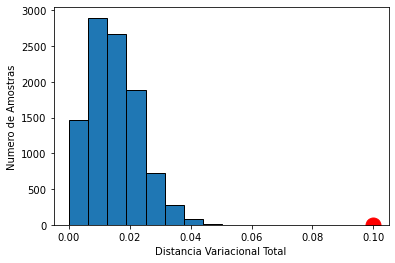

In [11]:
# YOUR CODE HERE
num_amostras = 10000
num_entrevistados = 1000
simulacoes = np.zeros(num_amostras)

prop_real = np.array([0.16, 0.64, 0.2])

for i in range (num_amostras):
    prop_amostra = gera_amostra(num_entrevistados)
    
    valor = tvd(prop_real, prop_amostra)
    simulacoes[i] = valor

plt.hist(simulacoes, edgecolor='k')
plt.ylabel('Numero de Amostras')
plt.xlabel('Distancia Variacional Total')
plt.plot([0.1], [0], 'ro', ms=15)
plt.show()

F) Escreva uma função q1f(x) que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de x% de confiança.

__Dica__: Utilize o método baseado em boostrap, ou seja, calcule o TVD para um número grande de amostras da população, como foi feito no passo anterior. Em seguida, encontre o percentil dos TVDs calculados que corresponde ao nível de confiança de 90%.

Retorne apenas o lado direito do intervalo de confiança para o TVD.


In [12]:
def q1f(x):
    # YOUR CODE HERE
    
    num_amostras = 10000
    num_entrevistados = 1000
    simulacoes = np.zeros(num_amostras)

    prop_real = np.array([0.16, 0.64, 0.2])

    for i in range (num_amostras):
        prop_amostra = gera_amostra(num_entrevistados)
    
        valor = tvd(prop_real, prop_amostra)
        simulacoes[i] = valor
    
    num = (100-x)/2
    ponto = x+num
    
    superior = np.percentile(simulacoes, ponto)
    
    return round(superior, 3)

In [13]:
from numpy.testing import *
assert_almost_equal( q1f(95), 0.034, 3 )
assert_almost_equal( q1f(90), 0.031, 3 )
assert_almost_equal( q1f(80), 0.026, 3 )

# Exercício 02:

Usando os dados do arquivo ```enem2015.csv```, vamos realizar um teste por permutação.

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('enem2015.csv')
df.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


A) Implemente uma função que retorne a diferença entre a média das notas das escolas públicas federais e a média das notas de  escolas privadas. Exemplo:

```python
def q2a(df):
    media_federal = 631.0
    media_particular = 620.0
    return 11.0
```

In [16]:
def q2a(df):
    # YOUR CODE HERE
    dados_federais = df.loc[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Federal'] 
    dados_privadas = df.loc[df['DEPENDENCIA_ADMINISTRATIVA'] == 'Privada'] 
    medias_federais = dados_federais.groupby(by=['DEPENDENCIA_ADMINISTRATIVA']).mean()
    medias_privadas = dados_privadas.groupby(by=['DEPENDENCIA_ADMINISTRATIVA']).mean()
    
    media_notas_federais = medias_federais['NOTA_MEDIA_ESCOLA'] 
    media_notas_privadas = medias_privadas['NOTA_MEDIA_ESCOLA'] 
    
    resultado = media_notas_federais[0] - media_notas_privadas[0]
    
    return  resultado

In [17]:
#Resposta
q2a(df)

9.21003744957261

B) Realize permutações com os rótulos (Federal / Privada), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias notas, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

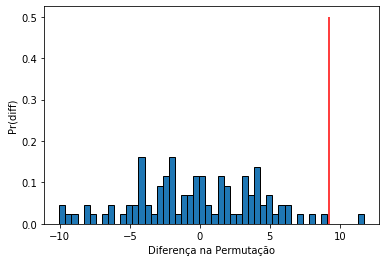

In [18]:
from IPython.display import Image
Image('100permutacoes.png')

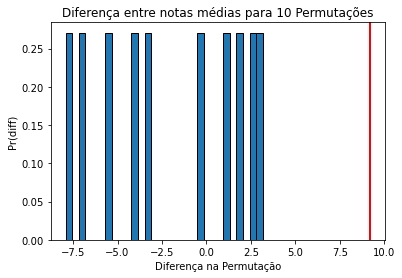

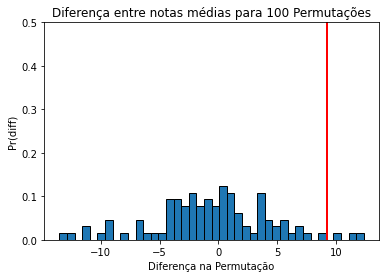

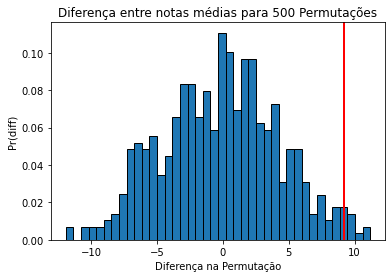

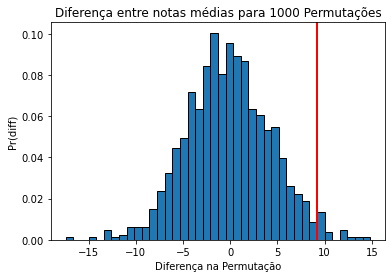

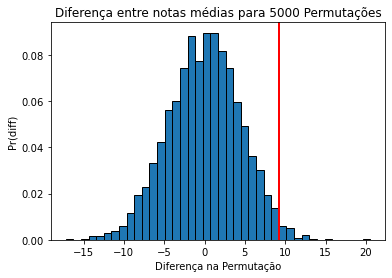

In [19]:
# YOUR CODE HERE

df2 = df[df['DEPENDENCIA_ADMINISTRATIVA'].isin(['Federal', 'Privada'])]

valores = df2['NOTA_MEDIA_ESCOLA']

#10 Permutações
simulacoes_diferencas = np.zeros(10) 

for i in range(10):
    grupos = np.array(df2['DEPENDENCIA_ADMINISTRATIVA'])
    
    np.random.shuffle(grupos)
    
    dic = {"DEPENDENCIA_ADMINISTRATIVA":grupos, "NOTA_MEDIA_ESCOLA":valores}
    data = pd.DataFrame(dic)
    
    medias = data.groupby(by=['DEPENDENCIA_ADMINISTRATIVA']).mean()
    
    simulacoes_diferencas[i] = medias['NOTA_MEDIA_ESCOLA'][0] - medias['NOTA_MEDIA_ESCOLA'][1]

plote = plt.hist(simulacoes_diferencas, bins=30, density = True, edgecolor='k')
plt.title("Diferença entre notas médias para 10 Permutações")
plt.xlabel("Diferença na Permutação")
plt.ylabel("Pr(diff)")
#plt.ylim(0, 1)
plt.axvline(x=q2a(df), color='r', linestyle='solid', linewidth=2)
plt.show()

#100 Permutações
simulacoes_diferencas = np.zeros(100) 

for i in range(100):
    grupos = np.array(df2['DEPENDENCIA_ADMINISTRATIVA'])
    
    np.random.shuffle(grupos)
    
    dic = {"DEPENDENCIA_ADMINISTRATIVA":grupos, "NOTA_MEDIA_ESCOLA":valores}
    data = pd.DataFrame(dic)
    
    medias = data.groupby(by=['DEPENDENCIA_ADMINISTRATIVA']).mean()
    
    simulacoes_diferencas[i] = medias['NOTA_MEDIA_ESCOLA'][0] - medias['NOTA_MEDIA_ESCOLA'][1]

plt.hist(simulacoes_diferencas, bins=40, density = True, edgecolor='k')
plt.title("Diferença entre notas médias para 100 Permutações")
plt.xlabel("Diferença na Permutação")
plt.ylabel("Pr(diff)")
plt.ylim(0, 0.5)
plt.axvline(x=q2a(df), color='r', linestyle='solid', linewidth=2)
plt.show()

#500 Permutações
simulacoes_diferencas = np.zeros(500) 

for i in range(500):
    grupos = np.array(df2['DEPENDENCIA_ADMINISTRATIVA'])
    
    np.random.shuffle(grupos)
    
    dic = {"DEPENDENCIA_ADMINISTRATIVA":grupos, "NOTA_MEDIA_ESCOLA":valores}
    data = pd.DataFrame(dic)
    
    medias = data.groupby(by=['DEPENDENCIA_ADMINISTRATIVA']).mean()
    
    simulacoes_diferencas[i] = medias['NOTA_MEDIA_ESCOLA'][0] - medias['NOTA_MEDIA_ESCOLA'][1]

plt.hist(simulacoes_diferencas, bins=40, density = True, edgecolor='k')
plt.title("Diferença entre notas médias para 500 Permutações")
plt.xlabel("Diferença na Permutação")
plt.ylabel("Pr(diff)")
plt.axvline(x=q2a(df), color='r', linestyle='solid', linewidth=2)
#plt.ylim(0, 0.5)
plt.show()

#1000 Permutações
simulacoes_diferencas = np.zeros(1000) 

for i in range(1000):
    grupos = np.array(df2['DEPENDENCIA_ADMINISTRATIVA'])
    
    np.random.shuffle(grupos)
    
    dic = {"DEPENDENCIA_ADMINISTRATIVA":grupos, "NOTA_MEDIA_ESCOLA":valores}
    data = pd.DataFrame(dic)
    
    medias = data.groupby(by=['DEPENDENCIA_ADMINISTRATIVA']).mean()
    
    simulacoes_diferencas[i] = medias['NOTA_MEDIA_ESCOLA'][0] - medias['NOTA_MEDIA_ESCOLA'][1]

plt.hist(simulacoes_diferencas, bins=40, density = True, edgecolor='k')
plt.title("Diferença entre notas médias para 1000 Permutações")
plt.xlabel("Diferença na Permutação")
plt.ylabel("Pr(diff)")
plt.axvline(x=q2a(df), color='r', linestyle='solid', linewidth=2)
#plt.ylim(0, 0.5)
plt.show()

#5000 Permutações
simulacoes_diferencas = np.zeros(5000) 

for i in range(5000):
    grupos = np.array(df2['DEPENDENCIA_ADMINISTRATIVA'])
    
    np.random.shuffle(grupos)
    
    dic = {"DEPENDENCIA_ADMINISTRATIVA":grupos, "NOTA_MEDIA_ESCOLA":valores}
    data = pd.DataFrame(dic)
    
    medias = data.groupby(by=['DEPENDENCIA_ADMINISTRATIVA']).mean()
    
    simulacoes_diferencas[i] = medias['NOTA_MEDIA_ESCOLA'][0] - medias['NOTA_MEDIA_ESCOLA'][1]

plt.hist(simulacoes_diferencas, bins=40, density = True, edgecolor='k')
plt.title("Diferença entre notas médias para 5000 Permutações")
plt.xlabel("Diferença na Permutação")
plt.ylabel("Pr(diff)")
plt.axvline(x=q2a(df), color='r', linestyle='solid', linewidth=2)
#plt.ylim(0, 0.5)
plt.show()

B) Escreva abaixo o que você observou com os gráficos.

Pode-se observar que os gráficos se aproximam cada vez mais de uma normal, conforme a quantidade de permutações aumenta.